##  Prediction of  Good or Poor Health Based on the Behavioral Risk Factor Surveillance System Survey

### Introduction

The Behavioural Risk Factor Surveillance System (BRFSS) is an annual health-related telephone survey conducted by the Centres for Disease Control and Prevention (CDC) in the United States to collect information about people's health-related risk behaviours, chronic health conditions, and use of preventive services. The survey data is made accessible to the public as Real World Data (RWD) on the CDC's website.


The goal of this data project is to create a prediction classification model that can determine whether a survey participant's health is 'Good or Better' or 'Fair or Poor' based on the information received from the survey. This can assist healthcare providers in better understanding and identifying potential health concerns in their patients, allowing them to give appropriate preventative care.


**Goal**: The objective of this data project is to develop a predictive classification model that can determine whether a survey participant can be classified as being in 'Good or Better' health or 'Fair or Poor' health based on the information gathered from the survey. This can help healthcare providers to better understand and identify potential health risks in their patients and provide appropriate preventive care measures.


### Methods

For this data project, the 2015 BRFSS dataset was used to develop a predictive classification model to determine whether survey participants were classified as being in 'Good or Better' health or 'Fair or Poor' health. The data was obtained from a CSV file generated by Kaggle, which was created by importing the SAS data using Pandas. The use of this CSV file was deemed appropriate as the focus of the project was on modeling rather than data extraction and transformation.

To better understand the dataset, the 2015 BRFSS Codebook was consulted to decipher the meaning and importance of the numerous features, which have complex variable names.

The initial model utilized was a Decision Tree Classifier, which is easy to understand and interpret, but can lead to overfitting on the training data, thereby reducing the model's robustness. To improve model robustness, a Random Forest Classifier was implemented, which employs bagging and forests (ensembles of multiple decision trees) to create a more resilient model with lower variance.

To further enhance the model's predictive power, hyperparameter optimization was carried out using cross-validation. This was aimed at reducing overfitting and selection bias while improving prediction accuracy.

Various scoring methods, including accuracy, precision and recall, and the receiver operator characteristic, can be employed to evaluate model performance. The choice of scoring method used will depend on the specific requirements of the problem and the data explored. These choices will be carefully considered and explained as the project progresses.

-----

## Here are the general steps that we are going to follow:



**Data Collection and Preprocessing:** Collect the required data and preprocess it to ensure its quality, including data cleaning, data transformation, and data normalization.

**Feature Engineering:** Create relevant features from the preprocessed data. Feature engineering helps the model to better understand the relationships between the data and the outcome you're trying to predict.

**Model Selection:** Choose the best machine learning algorithm that fits your data and problem. Consider factors such as accuracy, interpretability, scalability, and ease of deployment.

**Model Training:** Train the chosen model on the preprocessed and engineered data. Use cross-validation to ensure that the model performs well on unseen data.

**Model Evaluation:** Evaluate the trained model's performance using metrics such as accuracy, precision, recall, and F1 score.

**Model Deployment:** Deploy the model into a production environment, which can include cloud-based services, on-premise deployment, or edge deployment.

**Monitoring and Maintenance:** Continuously monitor the model's performance and retrain it with new data as needed

### Data and Libraries Used

**Data Sources:**
The 2015 BRFSS dataset was collected in CSV format from Kaggle, and the variables were interpreted using the BRFSS Codebook. Understanding the meaning and importance of the variables in the dataset required the use of the Codebook.

**libraries:**
For data analysis, several libraries and programmes were utilised, including the Scikit-Learn library, Pandas, NumPy, and Matplotlib. According to the Python style guide, these were all imported at the beginning of the code, with their initial use highlighted to ensure clarity when using individual functions.

The Graphviz programme was also used to create representations of decision trees. This may be installed from the repository on Debian and Ubuntu by running sudo apt install graphviz.


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz # to export tree as a .dot file
from subprocess import call # for system call (to generate tree image)
from IPython.display import Image # for loading tree image
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix
import time # for measuring runtime during cross validation
from joblib import dump, load #to save fitted models to disk (saves a lot of time)

### Loading and Cleaning the Dataset

Importing the CSV into our workspace, and then selecting a subset of the total data for faster fitting.

In [3]:
seed = 100 # if you want to reproduce my work

df = pd.read_csv('2015.csv')
print(f'The dataset has {df.shape[0]} subjects and {df.shape[1]} variables')

df = df.sample(120000, random_state=seed)
print(f'The sampled dataset has {df.shape[0]} subjects and {df.shape[1]} variables')

The dataset has 441456 subjects and 330 variables
The sampled dataset has 120000 subjects and 330 variables


In [4]:
df.head(10)

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
59442,9.0,4.0,b'04062015',b'04',b'06',b'2015',1100.0,2.015008e+09,2.015008e+09,NaN,...,3.0,2.0,3.0,3.0,4.0,1.0,2.0,NaN,NaN,2.0
295595,38.0,9.0,b'09112015',b'09',b'11',b'2015',1100.0,2.015002e+09,2.015002e+09,1.0,...,4.0,2.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN,2.0
382864,49.0,4.0,b'05202015',b'05',b'20',b'2015',1100.0,2.015009e+09,2.015009e+09,NaN,...,1.0,1.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,2.0
440752,72.0,9.0,b'10262015',b'10',b'26',b'2015',1100.0,2.015005e+09,2.015005e+09,NaN,...,4.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0
23981,5.0,5.0,b'05242015',b'05',b'24',b'2015',1200.0,2.015004e+09,2.015004e+09,NaN,...,9.0,9.0,3.0,3.0,4.0,9.0,9.0,9.0,9.0,NaN
268137,35.0,2.0,b'04032015',b'04',b'03',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,1.0,1.0,3.0,3.0,4.0,1.0,1.0,2.0,1.0,2.0
329460,44.0,2.0,b'02032015',b'02',b'03',b'2015',1100.0,2.015001e+09,2.015001e+09,1.0,...,4.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,2.0
437689,72.0,7.0,b'07302015',b'07',b'30',b'2015',1100.0,2.015002e+09,2.015002e+09,1.0,...,4.0,2.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN,1.0
246807,32.0,2.0,b'02092015',b'02',b'09',b'2015',1100.0,2.015001e+09,2.015001e+09,1.0,...,1.0,1.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,1.0
186609,26.0,1.0,b'03192015',b'03',b'19',b'2015',1100.0,2.015003e+09,2.015003e+09,1.0,...,9.0,9.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0


When the dataset was examined, it was discovered that some columns contained NaN values, which frequently reflected blank or omitted responses. In the _FLSHOT6 column, for example, a blank value denoted an exclusion criteria of age less than 65, whereas 1, 2, and 9 were valid responses.

However, because machine learning models cannot tolerate NaN values, these rows must be eliminated or the NaN values must be restored using imputation methods. Imputation is a statistical approach for replacing missing data with plausible values, and there are numerous strategies for doing so.


In [5]:
print(df.dropna().shape)

(0, 330)


Excluding observations with NaN values can result in significant data loss, and it is important to handle missing values appropriately. One possible approach is to replace missing values with a reasonable value such as the mean, median, or mode of the feature. However, this approach may not be optimal for all features, and it is essential to investigate each feature and determine the best approach for handling missing values.

In this case, the author has decided to replace missing values with the mean value of each feature, which is a reasonable initial approach. They have also chosen to drop three non-numeric columns, which are not relevant for the analysis.

However, it is important to note that this approach may not be optimal for all features, and it is advisable to investigate each feature and determine the best approach for handling missing values. Additionally, other methods such as imputation or interpolation may be more appropriate for certain features.

In [6]:
df = df.fillna(df.mean())
df = df.select_dtypes('number')

C:\Users\jasee\AppData\Local\Temp\ipykernel_2676\2430567400.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


The _RFHLTH column is of interest as the predicted class for this analysis. According to the codebook, it indicates the health status of adults as good or better health (1), fair or poor health (2), or missing data (9). However, this variable is a calculated variable based on the GENHLTH variable, and some other variables with no responses. Therefore, we need to drop those variables from our dataframe.

After an exploratory model, it became clear that dropping all the NaN was not sufficient, and we need to remove these variables. I found an excellent guide in the 'Helpful Resources' that excludes several other features. This approach resulted in a model with differently weighted feature importance in their final model, although they did not provide a clear explanation.

In [7]:
df = df.drop(columns = ['PAINACT2', 'QLMENTL2', 'QLSTRES2','QLHLTH2', 'GENHLTH'])

<Axes: xlabel='_RFHLTH', ylabel='count'>

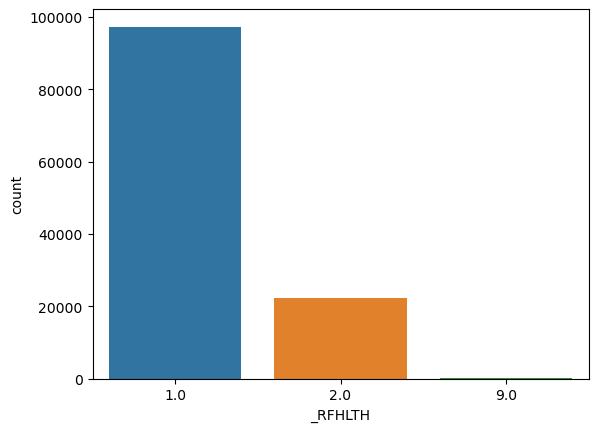

In [8]:
import seaborn as sns

sns.countplot(x='_RFHLTH', data=df)


I'll plot the distribution of `_RFHLTH` variable to get an intuitive idea of the data spread. This is important to clean up any missing data (if its a small percent), or to see if our class labels are imbalanced (which has implications for model scoring methods)

_RFHLTH
1.0    97272
2.0    22411
9.0      317
Name: _RFHLTH, dtype: int64


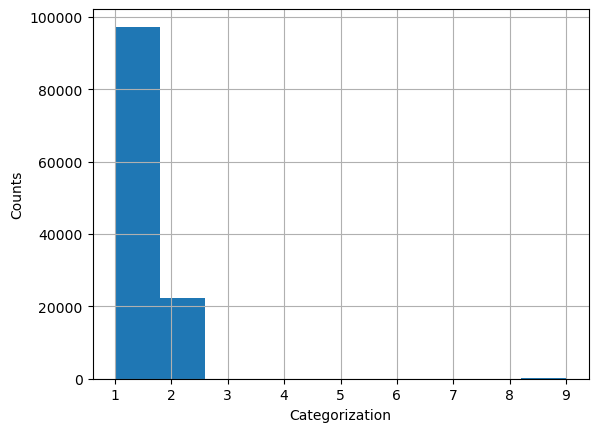

In [9]:
df['_RFHLTH'].hist()
plt.xlabel('Categorization')
plt.ylabel('Counts')

print(df.groupby(['_RFHLTH'])['_RFHLTH'].count())

A small percentage of observations have missing values in the _RFHLTH column. I'll simply exclude them. For consistency, I'll rename 2 as 0 to represent the 'bad health' class, and pop the label column as a separate dataframe for use in our models.

In [10]:
df = df[df['_RFHLTH'].isin([1,2])]
df['_RFHLTH'] = df['_RFHLTH'].replace({2:0})
label = df.pop('_RFHLTH')

I'll be dividing the dataset into a training and test dataset for evaluating the decision tree and random forests classification models. 

### Splitting Data into a Training and Test Set

The dataset is split into training and testing sets using the train_test_split() function from Scikit-Learn's model_selection module. A 75/25 split is used, where 75% of the data is used for training our models, and the remaining 25% is used for evaluating the trained models. The random_state parameter is set to 42 to ensure reproducibility. This function shuffles the data before splitting, so we should get a representative sample in both the training and testing sets.The training data will also be used for cross validation (which uses its subset for validation).

In [11]:
# from the sklearn.model_selection library
# stratify selects the training groups to reflect label distribution

X_train, X_test, y_train, y_test = train_test_split(df, label, 
                                                    train_size=0.75,
                                                    random_state=seed,
                                                    stratify = label)

### Functions to Predict, Visualize, and Evaluate Classification Models

To streamline the process of generating, evaluating, and visualizing predictions for our models, I have created three wrapper functions.

The first function, predict_train_test(), takes as input a fitted model class, the training dataset, and the test dataset. It outputs the predicted class probabilities (needed to create ROC curves) and class predictions for both the training and testing datasets.

The second function, visualize_tree(), generates a plot of the decision tree up to a specified depth (default is 5), allowing us to visualize which features are most important during classification (assessed via Gini impurity).

The third function, important_features(), simply lists the top ten features ranked by their importance in the model fit. These functions will help us streamline the model selection and evaluation process.

In [12]:
def predict_train_test(model, xtrain, xtest):
    
    # make predictions for training and test data
    # .predict_proba predicts probability of each observation being class 0 or 1
    # As we want probabilities of class 1, we are selection column 1

    _train_proba = model.predict_proba(xtrain)[:, 1]
    _test_proba = model.predict_proba(xtest)[:, 1]

    _train_predict = model.predict(xtrain)
    _test_predict = model.predict(xtest)
    
    return _train_proba, _test_proba, _train_predict, _test_predict

In [13]:
def visualize_tree(_tree, image_name):
    # image_name is a string you provide
    
    # from sklearn.tree to export .dot file
    export_graphviz(_tree, image_name+'.dot', max_depth = 5, 
                    feature_names = features,
                    class_names = ['poor health', 'good health'],
                    filled = True )

    # from suprocess library
    call(['dot', '-Tpng', image_name+'.dot', '-o', image_name+'.png', '-Gdpi=200'])

    # IPython.display library
    return Image(filename=image_name+'.png')


In [14]:
features = list(X_train.columns)


def important_features(_features, fitted_model, out=10):
    feat_imp = pd.DataFrame({'feature': _features,
                             'importance': fitted_model.feature_importances_}).\
                              sort_values('importance', ascending=False)
    
    return feat_imp.head(out)
    

The function scoring_metrics() is designed to take the output from the predict_train_test() function and generate scoring metrics, including accuracy, precision, and the area under the curve (AUC) of the Receiver Operating Characteristic (ROC) curve. The function also plots the ROC curve and the confusion matrix using the display_confusion() function.

The class label distribution in our dataset is imbalanced, with the healthy class being much larger than the other class (81% to 19%). When the class distribution is imbalanced, the accuracy metric is not very useful for model evaluation, as the imbalance can lead to a high accuracy score even if the model is not performing well. This is because accuracy is calculated based on the total number of correct predictions divided by the total number of predictions, regardless of the class label. In our case, if the model simply predicts 1 for all inputs, the accuracy will be at least 81%. Therefore, a metric that only evaluates each class prediction independently is more useful for our needs.

The AUC of the ROC curve is a more useful metric for evaluating our model in this case. The ROC curve plots the true positive rate (sensitivity) against the false positive rate (1-specificity) at various probability thresholds from 0 to 1. As each axis is derived from a measure independent of the other class label (ground truth), the respective class sizes do not affect this parameter.

In addition to the ROC curve, the function also plots the confusion matrix using the display_confusion() function. The confusion matrix is another way to visualize the true positive (TP), true negative (TN), false positive (FP), and false negative (FN) rates, which can be used to derive the accuracy, precision, and recall metrics.


In [15]:
def scoring_metrics(ytr_true, ytr_pred, ytr_prob, y_true, y_pred, y_prob):
    # we don't really need to plot the training ROC curve
    # but it is nice to have the scores printed for comparison
    # input is (y_training_label, y_training_prediction, y_training_probability,
    #           y_test_label, y_test_prediction, y_test_probability)
    
    y_base = np.ones(len(y_true))
    y = {'Training Data': [ytr_true, ytr_pred, ytr_prob],
         'Baseline': [y_true, y_base, y_base],
         'Test Data':  [y_true, y_pred, y_prob]}
    for i in y:
        # functions from the sklearn.metrics library
        scores = {'accuracy':   accuracy_score(y[i][0], y[i][1]),
                  'precision': precision_score(y[i][0], y[i][1]),
                  'roc_auc':     roc_auc_score(y[i][0], y[i][2])}
        print(f"{i:13}: Accuracy: {scores['accuracy']:<4.2} Precision: {scores['precision']:<4.2} ROC_AUC: {scores['roc_auc']:<.2}")
    
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    # generally the baseline ROC AUC for classification is 0.5
    fpr_base, tpr_base, _ = roc_curve(y_true, y_base)
    
    plt.plot(fpr, tpr, 'cornflowerblue', label='Model')
    plt.plot(fpr_base, tpr_base, 'r:', label='Baseline')
    plt.title('ROC Curve', fontsize=14)
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.legend()
    plt.grid(1)
    
    return scores

In [19]:
def display_confusion(y_true, y_pred):
    
    # from the sklearn.metrics library
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize = (6,6))
    # if you put the ticks later, plot formatting breaks
    plt.xticks([0,1], ['Bad Health', 'Good Health'])
    plt.yticks([0,1], ['Bad Health', 'Good Health'], rotation = 90, va='center')

    plt.imshow(cm, cmap='RdBu')
    # plt.text only plots one 'point' at a time, thus the loop
    for i,j,k in zip([0, 1, 0, 1], [0, 0, 1, 1], [str(i) for i in np.reshape(cm,-1)]):
        plt.text(i,j,k, horizontalalignment='center', verticalalignment='center')

    plt.colorbar()
    plt.xlabel('Predicted Value')
    plt.ylabel('True Value')
    plt.title('Confusion Matrix')
    return

### Fitting and Predicting Using a Decision Tree

Now that everything is set up, I can start building our models! To start with, I'll use a decision tree model. Decision trees are useful for gaining an understanding of which features are the most important in classifying our data. However, their main disadvantage is that they can overfit the training data, resulting in poor performance when tested on new data.

In [17]:
# from the sklearn.tree library
tree = DecisionTreeClassifier(random_state = seed)
tree.fit(X_train, y_train)

print('max depth:{}'.format(tree.tree_.max_depth),
     '\nnode count:{}'.format(tree.tree_.node_count), '\n')

print(important_features(features, tree))

max depth:54 
node count:14623 

      feature  importance
66   DIFFWALK    0.193926
22   PHYSHLTH    0.139281
249     _BMI5    0.014272
225   _LLCPWT    0.013487
62   QLACTLM2    0.013163
253   _EDUCAG    0.011520
45   DIABETE3    0.011200
215    _STSTR    0.010970
58   INTERNET    0.010477
273  _VEGESUM    0.010160


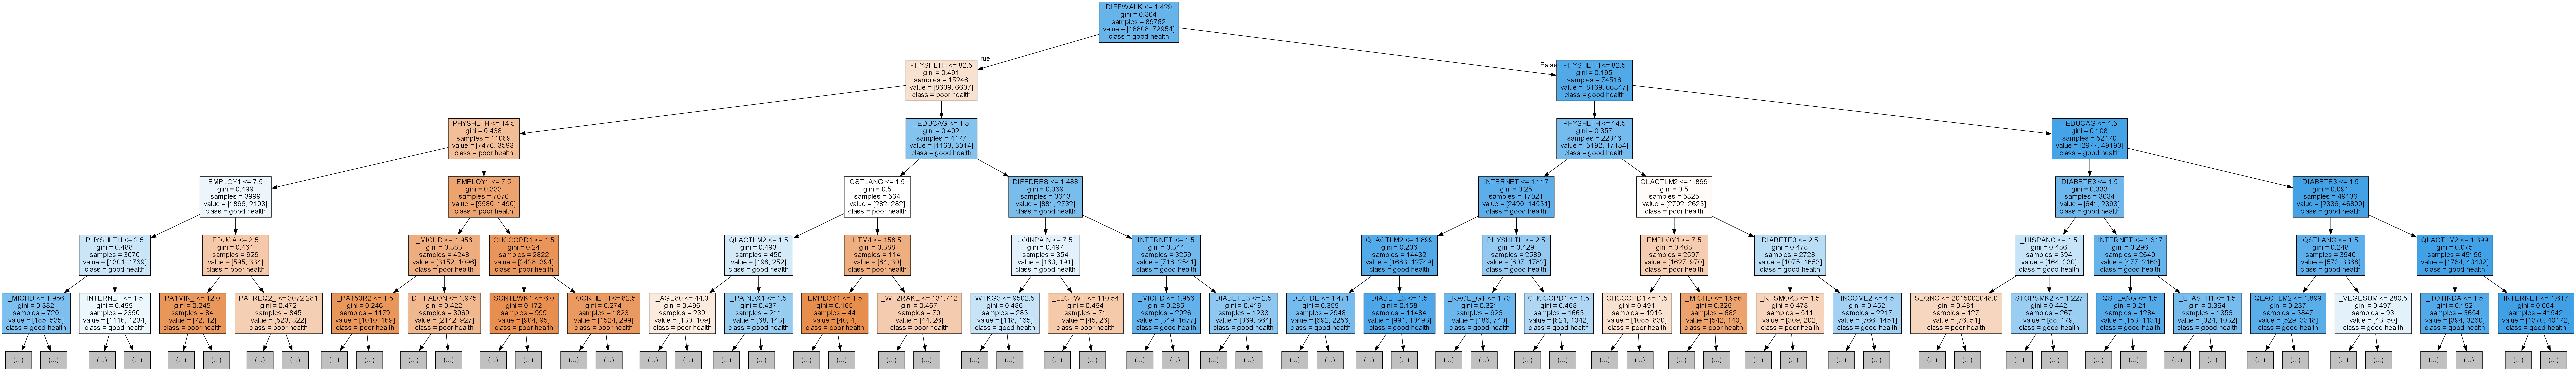

In [18]:
visualize_tree(tree, 'tree')

Training Data: Accuracy: 1.0  Precision: 1.0  ROC_AUC: 1.0
Baseline     : Accuracy: 0.81 Precision: 0.81 ROC_AUC: 0.5
Test Data    : Accuracy: 0.82 Precision: 0.89 ROC_AUC: 0.7


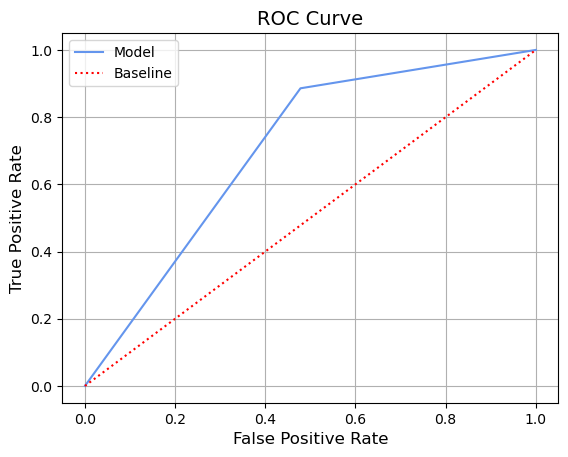

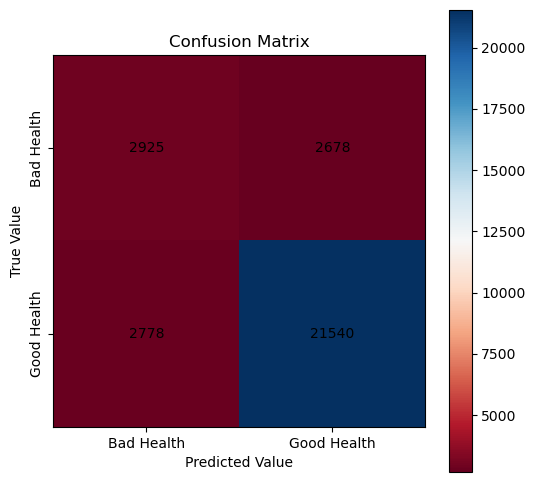

In [20]:
train_proba, test_proba, train_predict, test_predict = predict_train_test(tree, X_train, X_test)
scores = scoring_metrics(y_train, train_predict, train_proba, y_test, test_predict, test_proba)
display_confusion(y_test, test_predict)

The results of our decision tree model show that it performed very well on the training data, with all evaluation metrics (accuracy, precision, and AUC) being 1.0. However, as anticipated, the model overfit to the training data, resulting in a lower AUC score of 0.7 on the test data. Therefore, there is certainly room for improvement and we should consider other models to improve the test performance.

### Random Forest

 Random Forests tend to be more accurate than single decision trees, and are less prone to overfitting. They are particularly useful when dealing with complex datasets with many features. In the next step, I will use Random Forests to try and improve the performance of the model.

In [26]:
forest = RandomForestClassifier(n_estimators=50, 
                                random_state=seed, 
                                n_jobs=-1)

forest.fit(X_train, y_train)

## just an example of the of the trees in the ensemble (full list = len(n_estimators))
for i in forest.estimators_[0:1]:
    print(i)
    
n_nodes = []
max_depths = []

for tre in forest.estimators_:
    n_nodes.append(tre.tree_.node_count)
    max_depths.append(tre.tree_.max_depth)

# some parameters and results for sanity check
print('Number of trees:', len(forest.estimators_))
print('Average number of nodes:', int(np.mean(n_nodes)))
print('Average maximum depth:', int(np.mean(max_depths)))
print('Maximium maximum depth:', max(max_depths))
print('\n')
print(important_features(features, forest))

DecisionTreeClassifier(max_features='sqrt', random_state=186422792)
Number of trees: 50
Average number of nodes: 16388
Average maximum depth: 44
Maximium maximum depth: 53


      feature  importance
22   PHYSHLTH    0.038686
66   DIFFWALK    0.033372
62   QLACTLM2    0.030064
24   POORHLTH    0.027691
63   USEEQUIP    0.019788
68   DIFFALON    0.016334
95   JOINPAIN    0.016320
55    EMPLOY1    0.016246
311  _LMTSCL1    0.015762
67   DIFFDRES    0.012994


The application of the ensemble approach with random forests has resulted in a significant change in the feature importance weights compared to the original decision tree model. The top two features, DIFFWLK and PHYSHLTH, have switched in importance, and the weight of the other top ten features has been adjusted accordingly.

With the feature importance established, we can now proceed to predict the outcomes for both the training and test sets using the random forest model.

Training Data: Accuracy: 1.0  Precision: 1.0  ROC_AUC: 1.0
Baseline     : Accuracy: 0.81 Precision: 0.81 ROC_AUC: 0.5
Test Data    : Accuracy: 0.87 Precision: 0.89 ROC_AUC: 0.89


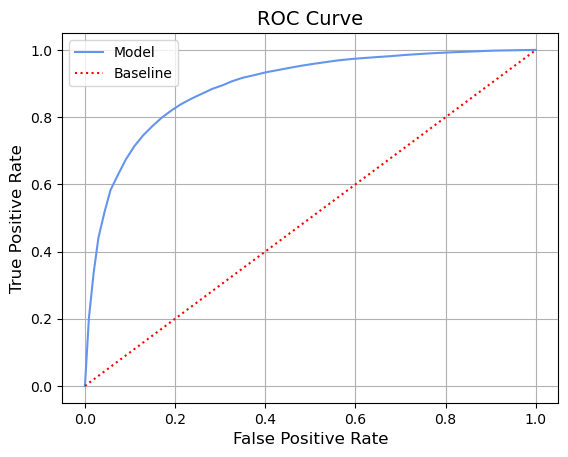

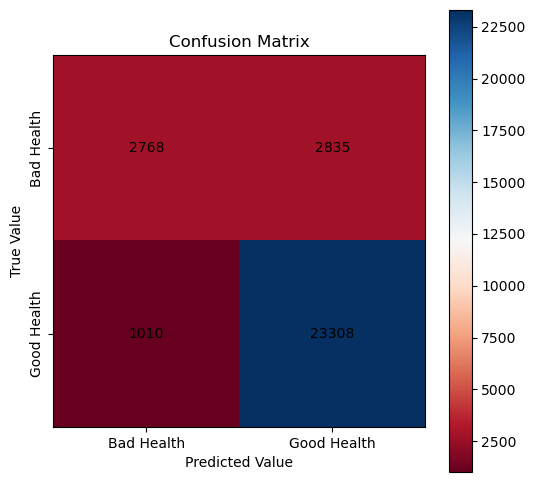

In [27]:
rftrain_proba, rftest_proba, rftrain_predict, rftest_predict = \
                                            predict_train_test(forest, X_train, X_test)

scores = scoring_metrics(y_train, rftrain_predict, rftrain_proba, y_test, rftest_predict, rftest_proba)
display_confusion(y_test, rftest_predict)

We can see that the random forest model lower our variance (decreases overfitting) compared to the decision tree. The AUC improves from 0.7 to 0.89 without any optimization of hyperparameters.

### Optimizing Hyperparameters using Cross Validation

Hyperparameters are parameters of a machine learning model that are not learned from the training data but are set before the training process begins. Examples include the number of trees in a random forest or the learning rate of a neural network. In order to determine the optimal hyperparameters, we can use cross-validation techniques such as k-fold cross-validation. This involves iterating through a range of hyperparameter values and evaluating the model's performance on each fold of the data. However, this process can be computationally expensive. Another approach is to use the RandomizedSearchCV function from the scikit-learn library, which randomly selects hyperparameters from the specified range of values, making the process faster but still effective.

In [ ]:
# using the scikit.model_selection library for GridSearchCV
params = {'n_estimators': [50, 100, 250, 350],
          'min_samples_split': [20, 30, 40],
          'min_samples_leaf': [1, 10, 20],
          'max_depth': [40, 50, 60]}

CVforest = RandomForestClassifier(random_state=seed, n_jobs=-1)

rs = GridSearchCV(CVforest, params, scoring = 'roc_auc', cv=5)

start = time.time()
rs.fit(X_train, y_train)
end = time.time()
print(f'{((end-start)/3600):.2f} hours')
print('The best parameters are:')
print(rs.best_params_)

We can directly plug-in the best estimator parameters into our new classifier

In [ ]:
cvforest = rs.best_estimator_
cvforest.fit(X_train, y_train)

print(important_features(features, cvforest))

The ranking of the top 5 important features has remained the same in the increased tree Random Forest model compared to the original one. However, some of the weights of the features have slightly shifted due to the increase in trees. This suggests that our original model was already well optimized, and the addition of more trees has led to a slight decrease in variance, with a slight increase in bias (as seen by the lower scores for the training dataset).

In [ ]:
cvtrain_proba, cvtest_proba, cvtrain_predict, cvtest_predict = \
                                            predict_train_test(cvforest, X_train, X_test)

scores = scoring_metrics(y_train, cvtrain_predict, cvtrain_proba, y_test, cvtest_predict, cvtest_proba)
display_confusion(y_test, cvtest_predict)


After optimizing hyperparameters, we observed a slight improvement in our recall score. However, it is worth noting that hyperparameter optimization can have a significant impact on some models, but in our case, the improvement was relatively minor and came at the expense of decreased specificity.

In addition, you may have noticed that we did not visualize any trees from our Random Forest models. While each tree in the forest shows a set of features, it does not provide a complete picture of the model's performance, which comes from the combination of all the trees into the ensemble model. Therefore, it may be more informative to analyze feature importances across all the trees rather than focusing on individual trees.

In [ ]:
## Now save the model

filename = 'my_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(cvforest, file)

### Conclusions

In this project, I demonstrated the use of a Random Forest (RF) model to predict a subject's health status based on their survey responses. The RF model showed a significant 28% improvement in AUC compared to the overfitted Decision Tree classifier. Additionally, I used cross-validation to optimize the hyperparameters, which resulted in a slightly higher AUC (1.1% improvement) than the baseline RF model.

Looking at the bigger picture, the model reveals that two of the most critical predictors of a subject's health status are the number of days during the past 30 days that their physical health was not good (PHYSHLTH) and if they have a serious difficulty walking or climbing stairs (DIFFWALK). This finding is interesting for two reasons. Firstly, it intuitively makes sense that any problems a person has had in the immediate past are good predictors of their overall health status. Secondly, although the survey asked for both physical and mental health (MENTHLTH) status in the past 30 days, mental health was less important as a predictor for their overall health status.

This project's scope can be expanded for future studies in several ways. For example, a comparison could be made between the predictions of the model that uses all features and a model that only uses PHYSHLTH and DIFFWALK, using AUC as the scoring metric. Additionally, a model that ignores short-term (less than 30 days) behavior could be developed. Instead of making a classifier, a regressor could also be constructed. Lastly, instead of modeling, the statistical significance of the differences in the top important features could be calculated, providing a more holistic approach to the dataset, from analysis to modeling.

-------------

## After saving the weights in my_model.pkl we will going to next step:

**Model Deployment:** Deploy the model into a production environment, which can include cloud-based services, on-premise deployment, or edge deployment.

**Monitoring and Maintenance:** Continuously monitor the model's performance and retrain it with new data as needed